### Data cleaning

Very often we need to work with some messy data where we have missing values, null values, missing formats and some non-understandable values so data needs to be cleaned and this is very crucial part of machine learning.

Let's read the `diamonds_messy.csv` file. This is very messy dataset of diamonds.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Rango/data/diamonds_messy.csv', index_col=0)
df

,carat,cut,price,x,y,z
0,2.19,Good,13978.0,8.26,8.17,5.23
1,1.22,Ideal,5099.0,6.89,6.95,4.22
2,0.70,Ideal,2874.0,5.77,5.73,3.51
3,0.40,Very Good,1033.0,NaN,4.76,2.90
4,1.03,Ideal,5037.0,6.54,6.5,3.97
...,...,...,...,...,...,...
1005,1.08,Ideal,5172.0,6.54,6.61,4.07
1006,0.53,Very Good,1852.0,5.28,5.39,3.12
1007,1.60,Premium,10064.0,7.54,7.49,4.65
1008,0.30,Premium,776.0,4.35,NaN,2.63


Let's check general information about dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1010 entries, 0 to 1009
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   956 non-null    float64
 1   cut     980 non-null    object 
 2   price   983 non-null    float64
 3   x       954 non-null    float64
 4   y       936 non-null    object 
 5   z       1005 non-null   float64
dtypes: float64(4), object(2)
memory usage: 55.2+ KB


We see that we have 1010 rows but all of them contains some missing values. We can't work with this kind of dataset so we need to fix this problem.

At first we need to delete duplicate values, working on the same value for twice, needs more resources.

In [4]:
df.drop_duplicates(inplace=True)
df.shape

(1001, 6)

So we had 9 duplicate values

If we have lots of missing values in any row or column, we should delete such row/column. Deleting row is not very dangerous operation because usually we have lots of rows, but deleting a column can be dangerous because each column is a feature and has some information, if we delete the column it means that we delete some feature. In our case we don't have much missing values so we don't need to delete any column.

Let's discuss rows. We have 6 features, if 4 or more of them is empty for a row, this row doesn't have any value and it's better if we delete it. If we fill with missing values, it may cause more problem than just deleting it(because we have lots of rows).

In [5]:
(df.isnull().sum(axis=1) > 3).sum()

15

We have 15 rows that contains 4 or more missing values, 15 is not a big number because we have around 1000 rows so we can delete this 15 rows.

In [6]:
to_drop = df[df.isnull().sum(axis=1) > 3].index
df.drop(index=to_drop, inplace=True)
df

,carat,cut,price,x,y,z
0,2.19,Good,13978.0,8.26,8.17,5.23
1,1.22,Ideal,5099.0,6.89,6.95,4.22
2,0.70,Ideal,2874.0,5.77,5.73,3.51
3,0.40,Very Good,1033.0,NaN,4.76,2.90
4,1.03,Ideal,5037.0,6.54,6.5,3.97
...,...,...,...,...,...,...
996,0.40,Ideal,1050.0,4.77,4.75,2.92
997,0.32,NaN,672.0,4.42,4.39,2.66
998,1.23,Ideal,13034.0,6.95,7.03,4.19
999,1.41,Very Good,7339.0,7.36,7.44,4.33


We should care about missing values in our target column too. If we fill iit with wrong values, our model will learn from wrong dataset so it's better if we delete such values. 

Our target value is price:

In [7]:
df['price'].isnull().sum()

17

We have 17 missing values, let's delete them:

In [8]:
to_drop = df[df['price'].isnull()].index
df.drop(index=to_drop, inplace=True)
df

,carat,cut,price,x,y,z
0,2.19,Good,13978.0,8.26,8.17,5.23
1,1.22,Ideal,5099.0,6.89,6.95,4.22
2,0.70,Ideal,2874.0,5.77,5.73,3.51
3,0.40,Very Good,1033.0,NaN,4.76,2.90
4,1.03,Ideal,5037.0,6.54,6.5,3.97
...,...,...,...,...,...,...
996,0.40,Ideal,1050.0,4.77,4.75,2.92
997,0.32,NaN,672.0,4.42,4.39,2.66
998,1.23,Ideal,13034.0,6.95,7.03,4.19
999,1.41,Very Good,7339.0,7.36,7.44,4.33


Let's consider other columns step-by-step

In [9]:
df['carat'].isnull().sum()

39

In `carat` feature we have 39 missing values. Before we consider how to fill them, let's see their distribution.

In [10]:
df['carat'].describe()

count    930.000000
mean       0.801054
std        0.454077
min        0.200000
25%        0.400000
50%        0.710000
75%        1.047500
max        2.470000
Name: carat, dtype: float64

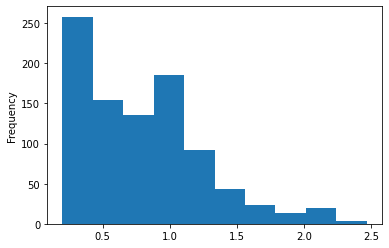

In [11]:
df['carat'].plot.hist()

We see that we have pretty fine distribution so we can fill missing values.

We can fill missing values using `fillna()` method from pandas library `SimpleImputer` method from sklearn library. The most common ways to fill missing values are filling with mean/mode/median.

Parameter of `fillna()` method should a number, `Series` or `DataFrame` that is used to fill missing values. If parameter is a number, than each missing value will be filled with this number. If the parameter is `Series`, than there should be (number of columns) element as it fills according to columns. If parameter is `DataFrame` - it fills according to indexes.

Let's fill all numeric column with it's own average value but before we do that, we need to make sure that we don't have any outliers in columns.

In [12]:
df['x'].describe()

count     929.000000
mean       12.165135
std       175.890144
min      -123.000000
25%         4.740000
50%         5.740000
75%         6.550000
max      5304.000000
Name: x, dtype: float64

As we know x means the length of diamond so it can't have negative value but our minimum value is (-123). Let's check how many negative values do we have in this column.

In [13]:
(df['x'] <= 0).sum()

3


We have 3 negative values, let's look at each of them:

In [14]:
df[df['x'] <= 0]

,carat,cut,price,x,y,z
610,1.66,Premium,9882.0,-22.0,7.58,4.73
650,0.72,Ideal,2976.0,0.0,5.85,0.00
984,0.38,Good,886.0,-123.0,4.87,2.74


We can delete this rows but as they have some logical values in other 5 columns(4 in case of 650 row), we can just assign zero value to this three rows and than fill them with other missing values.

In [15]:
import numpy as np

ind = df[df['x'] <= 0].index
df.loc[ind, 'x'] = np.NaN

We don't have inapropriate values anymore so now we can think about outliers. Average of this column is 12 and 75% percentile is 6.55, maximum value is 5304 that seems like to much for brilliant length. We can say that there won't be any briliant with more than 50mm length. 

In [16]:
df[df['x'] > 50]

,carat,cut,price,x,y,z
556,0.32,Premium,702.0,5304.0,4.43,2.67
684,0.34,Ideal,961.0,817.0,4.49,2.82


Let's discuss these rows. Even if 817mm and 5304mm are real values, than their prices are not real, so they seems like outliers.

We can visualize outliers:

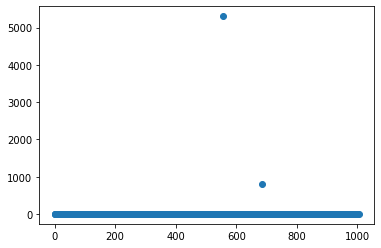

In [17]:
df['x'].plot(marker='o', linestyle='')

Or we can look at graph length vs price:

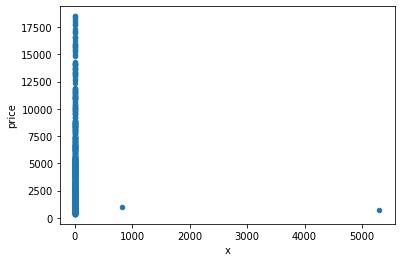

In [18]:
df.plot.scatter(x='x', y='price', marker='o')

Let's assign zero values to outliers:

In [19]:
ind = df[df['x'] > 50].index
df.loc[ind, 'x'] = np.NaN

plot histogram:

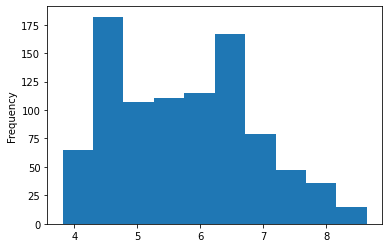

In [20]:
df['x'].plot.hist()

Seems like we don't have any problematic values in `x` feature so we can continue with `y`.

In [21]:
df['y'].describe()

count      911
unique     349
top       6.21
freq         8
Name: y, dtype: object

First of all we see that type of `y` is `object` instead of `float64`. The reason why this happened can be a string value, if one of the values is string, than pandas will store whole column as string.

In [22]:
df['y'].astype(np.float64)

ValueError: ignored

Here we see that we can't change type to `float64` as some values are strings in this column and we can't cast them. The reason of this can be wrong format(2,5 instead of 2.5) or something else. Let's check what kind of strings do we have.

In [23]:
def check(elem):     # Helper function that returns True if given string can't be casted as float
  try:
    float(elem)
    return False     # If it can be casted, we return False
  except ValueError:
    return True      # If it can't be casted, we return True

df[df['y'].apply(check)]   # Let's print values, where check function returns True

,carat,cut,price,x,y,z
16,0.46,Ideal,1955.0,4.95,ᛏᚩ ᚱᚢᚾᛖ,3.11
267,0.79,Very Good,3432.0,5.96,😄,3.57
839,0.36,Very Good,753.0,4.57,a,2.84
945,0.32,Premium,612.0,4.35,⠃⠗⠊⠇,2.71


All of this string are nonvaluable so we can assignt to them empty string value. We can use `to_numeric()` method from pandas library for that. We should pass one dimensional `Series` and optionally `errors` parameters. Let's pass `errors='coerce'` parameter so in case of some error, it will fill values with Nan.

In [24]:
df['y'] = pd.to_numeric(df['y'], errors='coerce')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 969 entries, 0 to 1005
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   930 non-null    float64
 1   cut     944 non-null    object 
 2   price   969 non-null    float64
 3   x       924 non-null    float64
 4   y       907 non-null    float64
 5   z       969 non-null    float64
dtypes: float64(5), object(1)
memory usage: 85.3+ KB


Now we have 907 values in `y` column.

Let's look at distribution of the column:

In [26]:
df['y'].describe()

count    907.000000
mean       5.779824
std        1.100201
min        3.780000
25%        4.755000
50%        5.770000
75%        6.560000
max        8.600000
Name: y, dtype: float64

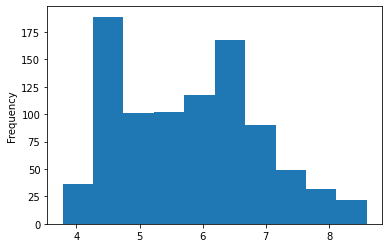

In [27]:
df['y'].plot.hist()

Everything seems fine, we can continue with `z` column

In [28]:
df['z'].describe()

count    969.000000
mean       3.500743
std        0.788279
min        0.000000
25%        2.930000
50%        3.540000
75%        4.020000
max        5.390000
Name: z, dtype: float64

Minimum value is 0 but height of brilian can't be zero. Let's look at zero values:

In [29]:
df[df['z'] == 0]

,carat,cut,price,x,y,z
161,1.21,Premium,5529.0,6.96,6.90,0.0
288,2.03,Premium,18477.0,8.24,8.16,0.0
335,0.31,Very Good,680.0,4.32,4.35,0.0
346,0.43,Ideal,954.0,4.86,4.89,0.0
377,0.30,Ideal,491.0,4.28,4.31,0.0
413,1.04,Ideal,6260.0,6.49,6.52,0.0
575,0.70,Very Good,3239.0,5.70,5.74,0.0
650,0.72,Ideal,2976.0,NaN,5.85,0.0
661,1.50,Premium,9954.0,7.48,7.43,0.0
677,0.34,Ideal,974.0,4.48,4.50,0.0


There are 14 zero values but other features of that rows seems normal so we can assign NaN values to that zero values.

In [30]:
ind = df[df['z'] == 0].index
df.loc[ind, 'z'] = np.NaN

plot histogram:

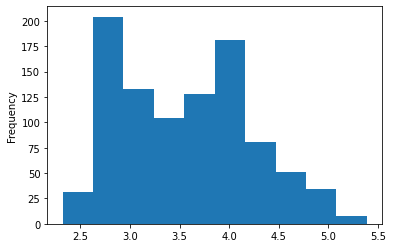

In [31]:
df['z'].plot.hist()

Let's check `price` column to avoid anomalies.

In [32]:
df['price'].describe()

count      969.000000
mean      3899.563467
std       3842.908815
min        367.000000
25%        988.000000
50%       2576.000000
75%       5154.000000
max      18480.000000
Name: price, dtype: float64

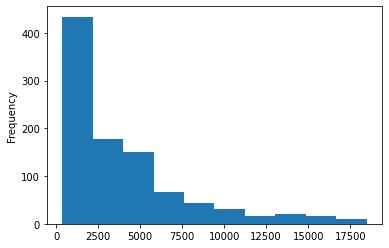

In [33]:
df['price'].plot.hist()

We see that we have much more briliants with low price than high prices and we almost don't have very expensive briliants. This means our dataset isn't balanced but we don't have any anomalies. We can plot scatterplot to make sure about anomalies.

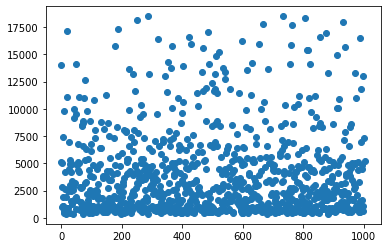

In [34]:
import matplotlib.pyplot as plt

df['price'].plot(marker='o', linestyle='')
plt.show()

Now we can fill empty values in each column with its average values.

In [35]:
df.fillna(df.mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 969 entries, 0 to 1005
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   969 non-null    float64
 1   cut     944 non-null    object 
 2   price   969 non-null    float64
 3   x       969 non-null    float64
 4   y       969 non-null    float64
 5   z       969 non-null    float64
dtypes: float64(5), object(1)
memory usage: 85.3+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Now we don't have any missing values in any numeric column.

Let's plot some histograms/plots

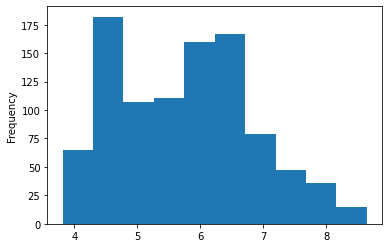

In [37]:
df['x'].plot.hist()

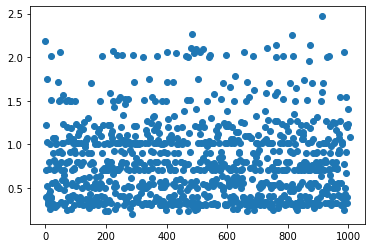

In [38]:
df['carat'].plot(marker='o', linestyle='')
plt.show()

Filling with mean values is not the best option but it may have positive effect on model result. In general we should try several different ways and choose the best one.

We have left only `cut` column that is categorical one. Let's check categories:

In [39]:
df['cut'].value_counts()

Ideal        350
Premium      233
Very Good    196
Good          93
Fair          21
IDEAL         11
very good      8
premium        8
GOOD           6
ideal          5
PREMIUM        4
VERY GOOD      3
good           2
FAIR           1
.,nd           1
x              1
463784638      1
Name: cut, dtype: int64

First of all we see that we have Ideal, IDEAL and ideal than should be the same(the same logic works for Good, GOOD, good and so on). The very simple solution is to make all string lowercase.

In [40]:
df['cut'] = df['cut'].apply(lambda x: x.lower() if not x is np.NaN else x)   # NaN-ებზე შეცდომას აგდებს lower, ამიტომ უნდა გავითვალისწინოთ

In [41]:
df['cut'].value_counts()

ideal        366
premium      245
very good    207
good         101
fair          22
.,nd           1
x              1
463784638      1
Name: cut, dtype: int64

We have 3 meaningless category, let's replace all of them with Nan.

In [42]:
df['cut'].replace(['463784638', 'x', '.,nd'], np.NaN, inplace=True)

In [43]:
df['cut'].value_counts()

ideal        366
premium      245
very good    207
good         101
fair          22
Name: cut, dtype: int64

The most common way to fill missing values in categorical column is to fill it with most frequent value(in our case - ideal).

In [44]:
df['cut'].fillna('ideal', inplace=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 969 entries, 0 to 1005
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   969 non-null    float64
 1   cut     969 non-null    object 
 2   price   969 non-null    float64
 3   x       969 non-null    float64
 4   y       969 non-null    float64
 5   z       969 non-null    float64
dtypes: float64(5), object(1)
memory usage: 85.3+ KB


Now we don't have any missing values

Often we have much more featues than we nedd to solve the problem. Working with lots of features needs additional resources and also it may damage our model. So we need to find out which features have a real effect on target column. We can use correlation matrix for this.

In [46]:
df.corr()

,carat,price,x,y,z
carat,1.000000,0.904982,0.933591,0.932899,0.937513
price,0.904982,1.000000,0.874330,0.876997,0.870982
x,0.933591,0.874330,1.000000,0.955929,0.958359
y,0.932899,0.876997,0.955929,1.000000,0.954769
z,0.937513,0.870982,0.958359,0.954769,1.000000


Bigger absolute value of correlation between two features means that this two features are much more connected to each other. Maximum value is 1(this means ideal correlation) so all diagonal values are 1. We see that all columns has high correlation to price column and this means that we shouldn't delete any of this columns, especially in our case when we don't have much features. In case some features has high correlation value to each other, we can delete one of them, for example if correlation value between `x` and `z` is 0.96 this means that they are almost the same feature and if we delete one of them, it won't damage our model because they have almost same meanings. In this case we delete the feature that has higher correlations with other columns on average.

We can visualize correlation matrix with seaborn library. We can use `heatmap()` function

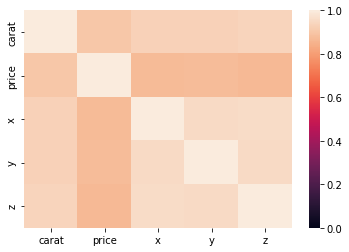

In [48]:
import seaborn as sns 

sns.heatmap(df.corr(), vmin=0, vmax=1)
plt.show()

Now we can standartize numerical values.

In [49]:
from sklearn.preprocessing import StandardScaler    

scaler = StandardScaler() 
df[['carat', 'x', 'y', 'z']] = scaler.fit_transform(df[['carat', 'x', 'y', 'z']])

In [50]:
df.describe()

,carat,price,x,y,z
count,9.690000e+02,969.000000,9.690000e+02,9.690000e+02,9.690000e+02
mean,1.109077e-16,3899.563467,-1.299270e-16,-1.945468e-16,-7.478251e-16
std,1.000516e+00,3842.908815,1.000516e+00,1.000516e+00,1.000516e+00
min,-1.351878e+00,367.000000,-1.811519e+00,-1.879824e+00,-1.855118e+00
25%,-8.795504e-01,988.000000,-9.305341e-01,-9.210293e-01,-9.215834e-01
50%,-1.823045e-01,2576.000000,5.765582e-15,8.348833e-16,-4.680658e-15
75%,5.149413e-01,5154.000000,7.108800e-01,6.863622e-01,7.045733e-01
max,3.753761e+00,18480.000000,2.676868e+00,2.650952e+00,2.767383e+00


and it's time for one hot encodding for categorical values.

In [51]:
from sklearn.preprocessing import OneHotEncoder 

ohe = OneHotEncoder(sparse=False)
one_hot = ohe.fit_transform(df[['cut']]) 

one_hot_df = pd.DataFrame(one_hot, columns=ohe.categories_[0]) 
df = pd.concat([df.drop(columns=['cut']).reset_index(drop=True), one_hot_df], axis=1)
df

,carat,price,x,y,z,fair,good,ideal,premium,very good
0,3.123990,13978.0,2.315200e+00,2.246754,2.526471,0.0,1.0,0.0,0.0,0.0
1,0.942286,5099.0,1.044727e+00,1.099960,1.005713,0.0,0.0,1.0,0.0,0.0
2,-0.227288,2874.0,6.092024e-03,-0.046834,-0.063334,0.0,0.0,1.0,0.0,0.0
3,-0.902042,1033.0,5.765582e-15,-0.958629,-0.981811,0.0,0.0,0.0,0.0,1.0
4,0.514941,5037.0,7.201535e-01,0.676962,0.629288,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
964,-0.902042,1050.0,-9.212606e-01,-0.968029,-0.951697,0.0,0.0,1.0,0.0,0.0
965,-1.081977,672.0,-1.245834e+00,-1.306427,-1.343180,0.0,0.0,1.0,0.0,0.0
966,0.964777,13034.0,1.100368e+00,1.175160,0.960542,0.0,0.0,1.0,0.0,0.0
967,1.369630,7339.0,1.480583e+00,1.560558,1.171340,0.0,0.0,0.0,0.0,1.0


Finally we should split our dataset to train, validation and test set. Train set is used for model training, via valid set we check the result of model we got from training and we change parameters on this step or we change model itself and finally we test our final result using test set.

Let's use 70/15/15 proportion for train/valid/test but first we should seperate target column. Usually target column is denoted by `y` and all other features by `X`.

In [52]:
from sklearn.model_selection import train_test_split

y = df['price']
X = df.drop(columns=['price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=3)

In [53]:
X_train

,carat,x,y,z,fair,good,ideal,premium,very good
107,-1.104468,-1.366390e+00,-1.362827e+00,-1.282951,0.0,0.0,0.0,1.0,0.0
429,-0.654632,-5.966872e-01,-5.732312e-01,-0.530101,0.0,0.0,1.0,0.0,0.0
487,0.897302,1.072548e+00,1.024760e+00,0.990656,0.0,0.0,1.0,0.0,0.0
236,-0.159813,-4.027561e-02,1.658205e-04,0.042065,0.0,0.0,1.0,0.0,0.0
619,1.009761,1.146736e+00,8.348833e-16,1.020770,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
952,-0.947026,5.765582e-15,-8.552297e-01,-1.222723,0.0,1.0,0.0,0.0,0.0
643,0.649892,8.036153e-01,8.555613e-01,0.779858,0.0,0.0,0.0,0.0,1.0
249,-1.126960,-1.357116e+00,-1.381627e+00,-1.298008,0.0,0.0,1.0,0.0,0.0
664,-1.126960,-1.347843e+00,-1.419227e+00,-1.252837,0.0,0.0,0.0,0.0,1.0


In [54]:
y_val

721     6997.0
358     4042.0
211     1311.0
227    13182.0
638      924.0
        ...   
673      602.0
890     2416.0
879     2770.0
134     8124.0
415    15897.0
Name: price, Length: 146, dtype: float64

In [55]:
X_test

,carat,x,y,z,fair,good,ideal,premium,very good
676,-8.570586e-01,-0.921261,-9.304293e-01,-0.801127,0.0,1.0,0.0,0.0,0.0
791,-7.670914e-01,-0.661602,-6.390308e-01,-0.846298,0.0,0.0,0.0,0.0,1.0
914,-1.081977e+00,-1.310749,8.348833e-16,-1.267894,0.0,0.0,0.0,1.0,0.0
592,-1.373209e-01,-0.031002,-2.803403e-02,0.102293,0.0,1.0,0.0,0.0,0.0
143,-9.920094e-01,-1.134552,-1.118428e+00,-1.042039,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
349,-9.020422e-01,-0.939808,-9.774291e-01,-0.981811,0.0,0.0,0.0,1.0,0.0
388,-3.995347e-15,-1.282928,-1.334627e+00,-1.267894,0.0,0.0,1.0,0.0,0.0
726,2.675315e-01,0.349212,2.915643e-01,0.508832,0.0,1.0,0.0,0.0,0.0
39,-1.373209e-01,0.089554,9.416533e-02,0.027008,0.0,0.0,1.0,0.0,0.0


Some models do this split process by its own so sometimes we don't need this split part.

In [65]:
X_train.to_csv('X_train.csv')

In [66]:
y_train.to_csv('y_train.csv')

In [67]:
X_val.to_csv('X_val.csv')

In [68]:
y_val.to_csv('y_val.csv')

In [69]:
X_test.to_csv('X_test.csv')

In [70]:
y_test.to_csv('y_test.csv')